Linear interpolation is a method of approximating a discrete set of (x, y) data as a combination of segments

# Use what you learned to fit a model to real data

In planetary science, we often want to know the radius of a planet (Rp) as a function of its mass (Mp). 

To obtain this value, we need elaborate interior structure models that will compute Rp as a function of Mp.

However, these models take a while to run, so we only generate a few points for each case. 

Is there a way to obtain intermediate values without the need to run the full model each time?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate
%matplotlib inline

Load data and create a linear interpolator

In [3]:
#load data from file
mass_a, mass_b, radius_a, radius_b, errors = np.loadtxt('mr_all.dat', skiprows=21, unpack=True, usecols= (4, 5, 6, 7, 8))

pl_mass = mass_a + mass_b
pl_radius = radius_a + radius_b

#create new arrays with values only where the error code is 0
pl_mass_valid = pl_mass[errors==0]
pl_radius_valid = pl_radius[errors==0]

#--- Linear interpolation ---
#create a function that, for any value of mass, computes the radius by linear interpolation
#this create a function with the name "rad_interpol" that will take 1 argument(mass) and return 1 value(radius)
rad_interpol = interpolate.interp1d(pl_mass_valid, pl_radius_valid, kind='linear', fill_value='extrapolate')

#test the interpolator
mass_test = 2.0
print(f'mass = {mass_test}, radius interpolated = {rad_interpol(mass_test)}')



mass = 2.0, radius interpolated = 2.0691786526554066


Now, define a model function and fit it to the data

In [4]:
#-- Line fit ---
#to get a good fit, we need a function with a 'good' shape, that can fit properly all data points
#define the fit model

def rad_model(mass, a, b, c, d):
    return 10**(a*np.log10(mass) + np.exp(-d*(np.log10(mass)+c)) + b)

#perform the fit
params, params_cov = optimize.curve_fit(rad_model, pl_mass_valid, pl_radius_valid, p0=[1,1,1,1])

param_err = np.sqrt(np.diag(params_cov)) #extract the diagonal, and apply the square root

#use fitted parameters to define the fitted function
def rad_fit(mass):
    return rad_model(mass, params[0], params[1], params[2], params[3])

#print results
print(f'a = {params[0]: .5f} +- {param_err[0]: .5f}')
print(f'a = {params[1]: .5f} +- {param_err[1]: .5f}')
print(f'a = {params[2]: .5f} +- {param_err[2]: .5f}')
print(f'a = {params[3]: .5f} +- {param_err[3]: .5f}')

a =  0.19712 +-  0.00090
a =  0.20634 +-  0.00123
a =  0.75394 +-  0.00538
a =  2.84984 +-  0.03337


Let's check how good the fit is

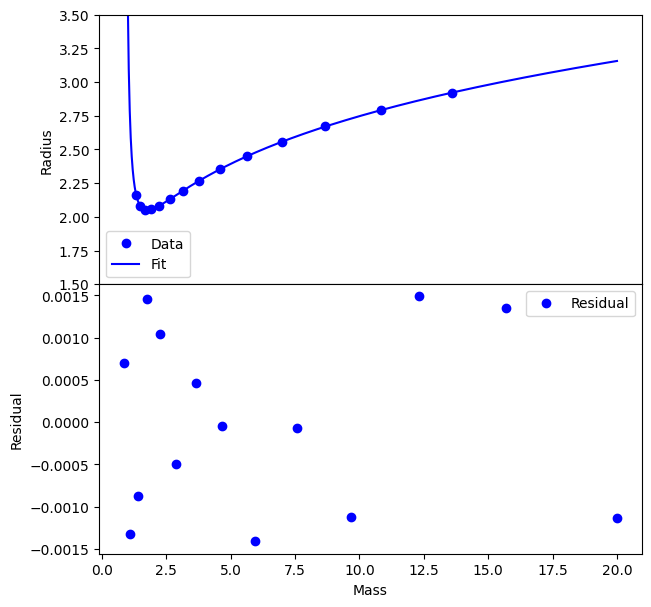

In [5]:
n = 500
masses = np.linspace(0.1, 30, n)
radii_int = rad_interpol(masses)
radii_fit = rad_fit(masses)

#create two figures
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#top plot is data and fit
ax1.plot(pl_mass_valid, pl_radius_valid, 'bo', label='Data')
ax1.plot(masses, radii_fit, 'b-', label="Fit")
ax1.set_xlabel('')
ax1.set_ylabel('Radius')
ax1.set_xticks([])
ax1.legend(loc=0)
ax1.set_ylim(1.5, 3.5)

#bottom panel is residuals
ax2.plot(pl_mass_valid, pl_radius_valid-rad_fit(pl_mass_valid), 'bo', label='Residual')
ax2.set_xlabel('Mass')
ax2.set_ylabel('Residual')
ax2.legend(loc=0)

plt.subplots_adjust(hspace=0.0)

plt.show()

Compare the data to the fit and to the interpolation

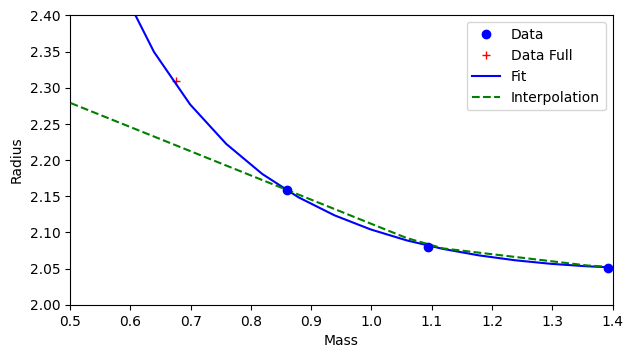

In [7]:
#create one figure
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

#top plot is data and fit
ax.plot(pl_mass_valid, pl_radius_valid, 'bo', label='Data', zorder=10)
ax.plot(pl_mass, pl_radius, 'r+', label="Data Full", zorder = 0)
ax.plot(masses, radii_fit, 'b-', label="Fit", zorder=0)
ax.plot(masses, radii_int, 'g--', label='Interpolation', zorder=6)
ax.set_xlabel('Mass')
ax.set_ylabel('Radius')
ax.legend(loc=0)

#full plot comparision
ax.set_xscale('log')
ax.autoscale(axis='x')
ax.set_ylim(1.5, 3.5)
ax.set_aspect(0.8)

#zoom around mass = 1
ax.set_xscale('linear')
ax.set_xlim(0.5, 1.4)
ax.set_ylim(2, 2.4)
ax.set_aspect(1.2)

plt.show()